# **Exploration of Natural Gas Data in EEA Countries Over Past 30 Years (1991-2020)**

**Author names :** 

Prasad Madushanka Dauglas Dambure Liyanage  
Upeksha Indeewari Edirisooriya Kirihami Vidanelage 

**Email :** 

al427069@uji.es      
al427066@uji.es

**Course :** MSc in Geospatial Technology

**Academic Year :** 2022/2023

##**Abstract**



In recent years, Natural gas has become one of the major energy sources in Europe. Since Russia is the largest natural gas producer for EU countries, the Russia and Ukraine war has been highly affected to EU natural gas energy requirement. In such a complicated background, what are the solutions for the Europe’s natural gas demand? This data analysis will answer this question by analyzing the natural gas consumption, production, import, export and reserves using pandas in python during 1991-2020 for EEA countries. In this study, extracted data obtained by U.S. Energy Information Administration are prepared for the analysis by reading data files, cleaning data frames, grouping and aggregation, merging etc.  Then typical operations such as computing statistics, creating plots, computing basic spatial operations, creating maps or other types of visualizations are done using Pandas,GeoPandas and seaborn. This study reveals that Norway, Netherlands have sufficient reserves for natural gas. As well as due to high amount of exports, production and less imports, Austria, Belgium, Czechia, France,  Greece, Portugal, Spain, Sweden will be danger to natural gas energy crisis in near future. 

##**Key Words**

*Natural Gas,  Data Analysis, EEA,  Pandas, Energy*

##**SDG goals**

[Ensure access to affordable, reliable, sustainable and modern energy for all](https://sdgs.un.org/goals/goal7)

##**1. Introduction**

Naural gas is one of the fossil fuels along with coal, sulfur, and petroleum. Hence it  cheaper to produce, cleanest burning, environmentally friendly, reliable and  more efficient storage and transportation compared to renewable energy sources, natural gas is considered as the "bridge fuel" that can help the world's nations transition from coal and oil to greener, more renewable energy sources. Therefore many of the countries that produce, consume, and possess reserves of natural gas.


In Europe, natural gas is used to heat about half of European households, and a big share of industry is powered by gas. [link](https://energy.ec.europa.eu/topics/oil-gas-and-coal/liquefied-natural-gas_en) . Overall gas consumption in Europe is ten times higher than that of electricity in the Nordic countries. As such, gas is an integral part of European energy system and currently accounting for a quarter of the EU's total energy consumption. About 26% of that gas is used in the power generation sector and about 23% in industry. Most of the rest is used in the residential and services sectors, mainly for heat in buildings. 

Due to current energy crisis and less domestic gas production in the Europe, the EU to diversify its gas supply, reduce consumption across the sector and accelerate the uptake of renewable energy. Then Russian fossil fuels brings the Europe closer to a more secure and sustainable energy supply. Around 10% of the Europe's gas needs are currently covered by domestic production. The rest is imported by pipeline or via LNG. Pipeline gas imports have been dominated by Russia in the past years. 
In 2021, the EU imported 83% of its natural gas. Since Russia’s invasion of Ukraine, gas imports from Russia to the EU have been significantly reduced. Between January and September 2022, the largest LNG exporters to the EU were the United States (44%), Russia (17%) and Qatar (13%). The United States is playing an increasingly important role in the EU gas supply. [link](https://www.consilium.europa.eu/en/infographics/eu-gas-supply/)

Therefore the war in Ukraine has created risks for Europe’s energy supply and in other side Norway also being currently the most leading natural gas supplier in the Europe.[link](https://www.washingtonpost.com/world/2022/10/08/norway-gas-prices-supply-europe/)

**This study aims to analysis annual natural gas consumption, production, reserves, import and export in the Europe mainly focusing in the countries within the European Economic Area [(EEA)](https://www.efta.int/eea) during last 30 years (1991 to 2020).**

**The main objective of this Data analysis -**
- To identify the patterns of Annual natural gas consumption, production, reserves, imports and exports for EEA countries.
- To find out the EEA countries which having the suffiecient natural gas reserves to processing and best natural gas exporters.
- To find out the EEA countries which mainly depend on importing natual gas.
- To identify the EEA countries which will be faced to natural gas crisis in near future due to Russia-Ukraine war by considering their annual consumption, production, reserves, import and export over the past 30 years.
- To generate tools for making varias types of maps/ plots from python programs. 

**This study mainly target to EEA member countries**

##**2. Data used**

**Input data: World natural gas statistics**

Source: [U.S. Energy Information Administration](https://www.eia.gov/international/data/world)

Following Microsoft Excel Comma Separated Values(.csv) files contain world natural gas consumptions, productions, imports, exports and reserves over 30 years
- `INT-Export-12-09-2022_11-20-20_consumption.csv`
- `INT-Export-12-09-2022_11-20-20_production.csv`
- `INT-Export-12-09-2022_13-21-43_imports.csv`
- `INT-Export-12-09-2022_13-22-07_exports.csv`
- `INT-Export-12-09-2022_13-22-20_reserves.csv`

**Input Spatial data**

Source: [Natural Earth](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/)

Following zipped file contain with the `ne_10m_admin_0_countries.shp` shape file is used to get spatial data for analysis.
- `ne_10m_admin_0_countries.zip`

##**3. Python libraries used**


- pandas (version 1.3.5) - for handling the non-spatial data
- geopandas (version 0.12.2) - for handling the spatial data
- numpy (version 1.21.6) - adding support data operations
- functools, reduce - for multile merging the dataframes
- matplotlib.pyplot (version 3.6.2) -for interactive visualizations in python
- seaborn (version 11.2) -for interactive visualizations in python

Now we are to read to our data files. First we need to import following useful libraries.

In [1]:
%%time
# Geopandas dependences
!pip install fiona shapely pyproj rtree descartes mapclassify 
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.6 MB 5.1 MB/s 
     |████████████████████████████████| 7.8 MB 50.3 MB/s 
     |████████████████████████████████| 1.0 MB 58.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
CPU times: user 203 ms, sys: 43.8 ms, total: 246 ms
Wall time: 13.1 s


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

##**4. Data Preprocessing**

Next we will upload the `ne_10m_admin_0_countries.zip` file to our `Exploration_of_Natural_Gas_data_in_EEA_Countries.ipynb` Google Colab notebook. 

In [7]:
#extracting the zipped file
!unzip ne_10m_admin_0_countries.zip

Archive:  ne_10m_admin_0_countries.zip
   creating: ne_10m_admin_0_countries/
  inflating: ne_10m_admin_0_countries/ne_10m_admin_0_countries.cpg  
  inflating: ne_10m_admin_0_countries/ne_10m_admin_0_countries.dbf  
  inflating: ne_10m_admin_0_countries/ne_10m_admin_0_countries.prj  
  inflating: ne_10m_admin_0_countries/ne_10m_admin_0_countries.README.html  
  inflating: ne_10m_admin_0_countries/ne_10m_admin_0_countries.sbn  
  inflating: ne_10m_admin_0_countries/ne_10m_admin_0_countries.sbx  
  inflating: ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp  
  inflating: ne_10m_admin_0_countries/ne_10m_admin_0_countries.shx  
  inflating: ne_10m_admin_0_countries/ne_10m_admin_0_countries.VERSION.txt  


Next upload the `INT-Export-12-09-2022_11-20-20_consumption.csv`,  `INT-Export-12-09-2022_11-20-20_production.csv`,  `INT-Export-12-09-2022_13-21-43_imports.csv`,  `INT-Export-12-09-2022_13-22-07_exports.csv`,`INT-Export-12-09-2022_13-22-20_reserves.csv` csv files to `Exploration_of_Natural_Gas_data_in_EEA_Countries.ipynb` Google Colab notebook.

Now you can see the uploaded files in the directory where you are currently working.    






In [8]:
!ls

INT-Export-12-09-2022_11-20-20_consumption.csv
INT-Export-12-09-2022_11-20-20_production.csv
INT-Export-12-09-2022_13-21-43_imports.csv
INT-Export-12-09-2022_13-22-07_exports.csv
INT-Export-12-09-2022_13-22-20_reserves.csv
ne_10m_admin_0_countries
ne_10m_admin_0_countries.zip
sample_data


After that we will read our .csv files using `pd.read_csv()` and .shp file using `gpd.read_file()` functions. 

In [9]:
"""reading .csv files specifing "--" charactors as no data values.
.csv files contain other unicods. for that we use encording='latin-1'
"""
source_file1 = "INT-Export-12-09-2022_11-20-20_consumption.csv"
data_consumption = pd.read_csv(source_file1, na_values=["--"], encoding='latin-1')

source_file2 = "INT-Export-12-09-2022_11-20-20_production.csv"
data_production = pd.read_csv(source_file2, na_values=["--"], encoding='latin-1')

source_file3 = "INT-Export-12-09-2022_13-21-43_imports.csv"
data_import = pd.read_csv(source_file3, na_values=["--"], encoding='latin-1')

source_file4 = "INT-Export-12-09-2022_13-22-07_exports.csv"
data_export = pd.read_csv(source_file4, na_values=["--"], encoding='latin-1')

source_file5 = "INT-Export-12-09-2022_13-22-20_reserves.csv"
data_reserve = pd.read_csv(source_file5, na_values=["--"], encoding='latin-1')

#reading the .shp file
world = gpd.read_file("ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")


In [10]:
#printing the first five rows in "data_consumption" dataframe 
data_consumption.head()

,Report generated on: 12-09-2022 13:21:20,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,API,NaN,1980.00000,1981.00000,1982.0000,1983.00000,1984.00000,1985.00000,1986.00000,1987.00000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,NaN,dry natural gas consumption (bcf),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INTL.26-2-WORL-BCF.A,World,52922.23848,53524.67675,53643.1437,54635.21427,59687.50427,62165.77219,63145.57905,66249.86511,...,121740.357,123444.6173,123677.6884,125487.0592,128072.9951,131647.8144,138329.8855,140542.7814,137862.2718,144658.8141
3,INTL.26-2-AFG-BCF.A,Afghanistan,2.00000,3.00000,5.0000,5.00000,5.00000,0.00000,0.00000,22.00000,...,5.66094641,5.45612115,5.01115593,5.16300914,5.83751991,5.51262467,5.41021204,4.54500189,2.83223894,se|2.8
4,INTL.26-2-ALB-BCF.A,Albania,10.00000,11.00000,10.0000,11.00000,11.00000,10.00000,14.00000,16.00000,...,0.600355,0.670985,1.13008,1.236025,1.5891615,1.765735,1.515804683,2.752030114,1.968859441,2.082494209


In [11]:
#printing the first five rows in "data_production" dataframe 
data_production.head()

,Report generated on: 12-09-2022 11:20:20,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,API,NaN,1980.00000,1981.000,1982.000,1983.000,1984.000,1985.00000,1986.0000,1987.000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,NaN,dry natural gas production (bcf),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INTL.26-1-WORL-BCF.A,World,53360.74231,54740.061,54563.957,55146.063,60028.777,62304.44316,63588.3623,66582.381,...,120389.6652,121682.1707,123398.3415,125640.5051,127106.2024,131013.1412,137510.6437,142243.6215,138084.2382,144193.4117
3,INTL.26-1-AFG-BCF.A,Afghanistan,60.00000,79.000,81.000,85.000,85.000,105.00000,105.0000,99.000,...,5.66094641,5.45612115,5.01115593,5.16300914,5.83751991,5.51262467,5.41021204,4.54500189,2.83223894,se|2.8
4,INTL.26-1-ALB-BCF.A,Albania,10.00000,11.000,10.000,11.000,11.000,10.00000,14.0000,16.000,...,0.600355,0.670985,1.13008,1.236025,1.5891615,1.765735,1.515804683,2.752030114,1.967931188,2.082494209


In [12]:
#printing the first five rows in "data_import" dataframe 
data_import.head()

,Report generated on: 12-09-2022 13:21:43,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,API,NaN,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,NaN,dry natural gas imports (bcf),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INTL.26-3-WORL-BCF.A,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37127.16874,37486.30144,36391.0244,37077.79689,38795.47208,42412.43019,42635.94261,43717.38256,42483.21749,45239.69589
3,INTL.26-3-AFG-BCF.A,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,INTL.26-3-ALB-BCF.A,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#printing the first five rows in "data_export" dataframe 
data_export.head()

,Report generated on: 12-09-2022 13:22:07,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,API,NaN,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,NaN,dry natural gas exports (bcf),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INTL.26-4-WORL-BCF.A,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35738.12441,36575.59072,35833.71234,36937.57525,38942.63734,41827.71098,42123.74226,43800.79703,42539.648,45136.7159
3,INTL.26-4-AFG-BCF.A,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,INTL.26-4-ALB-BCF.A,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#printing the first five rows in "data_reserve" dataframe 
data_reserve.head()

,Report generated on: 12-09-2022 13:22:20,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,API,NaN,1980.000,1981.000,1982.000,1983.000,1984.000,1985.000,1986.000,1987.000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,NaN,natural gas reserves (tcf),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INTL.3-6-WORL-TCF.A,World,2585.492,2648.307,2920.747,3031.823,3201.963,3401.635,3483.681,3641.325,...,6813.972,6850.943,6979.384,6957.378,6885.515,6929.786,7131.263,7176.885,7257.161,NaN
3,INTL.3-6-AFG-TCF.A,Afghanistan,2.190,2.119,2.260,2.119,2.119,2.119,2.366,2.260,...,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75
4,INTL.3-6-ALB-TCF.A,Albania,0.283,0.247,0.247,0.212,0.177,0.177,0.141,0.141,...,0.03,0.03,0.029,0.029,0.029,0.029,0.029,0.201,0.201,0.201


In [15]:
#printing the first five rows in "world" dataframe 
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


Next remove the unwanted columns from `data_consumption`, `data_production`, `data_import`, `data_export`, `data_reserve` dataframes

In [16]:
drop_columns1 = ["Report generated on: 12-09-2022 13:21:20","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 43"]
data_consumption = data_consumption.drop(drop_columns1,axis="columns")

drop_columns2 = ["Report generated on: 12-09-2022 11:20:20","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 43"]
data_production = data_production.drop(drop_columns2,axis="columns")

drop_columns3 = ["Report generated on: 12-09-2022 13:21:43","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 43"]
data_import = data_import.drop(drop_columns3,axis="columns")

drop_columns4 = ["Report generated on: 12-09-2022 13:22:07","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 43"]
data_export = data_export.drop(drop_columns4,axis="columns")

drop_columns5 = ["Report generated on: 12-09-2022 13:22:20","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 43"]
data_reserve = data_reserve.drop(drop_columns5,axis="columns")


In [17]:
#see the column names of world geoDataframe
world.columns.values

array(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF',
       'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF',
       'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV',
       'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0',
       'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8',
       'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR',
       'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2',
       'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3',
       'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO',
       'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU',
       'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN',
       'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB',
       'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA',
       'ADM0_A3_EG

Next select `ADMIN`,`SUBREGION`,`POP_EST`,`ECONOMY`,`INCOME_GRP`,`geometry` columns from `world` geoDataframe

In [18]:
world=world[["ADMIN","SUBREGION","POP_EST","ECONOMY","INCOME_GRP","geometry"]]
#printing the first five rows in "world" dataframe 
world.head()

,ADMIN,SUBREGION,POP_EST,ECONOMY,INCOME_GRP,geometry
0,Indonesia,South-Eastern Asia,270625568.0,4. Emerging region: MIKT,4. Lower middle income,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,South-Eastern Asia,31949777.0,6. Developing region,3. Upper middle income,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,South America,18952038.0,5. Emerging region: G20,3. Upper middle income,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,South America,11513100.0,5. Emerging region: G20,4. Lower middle income,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,South America,32510453.0,5. Emerging region: G20,3. Upper middle income,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


Next we will change column names to meaningful names. e.g. `1991` as `1991_C` for years in `data_consumption` dataframe.

In [19]:
for i in range(1, len(data_consumption.columns)):
  old_colname = data_consumption.columns[i]
  new_colname = str(1990+i)+"_C"
  data_consumption = data_consumption.rename({old_colname: new_colname}, axis="columns")

data_consumption = data_consumption.rename({"Unnamed: 1":"COUNTRY"}, axis="columns")

for i in range(1, len(data_production.columns)):
  old_colname = data_production.columns[i]
  new_colname = str(1990+i)+"_P"
  data_production = data_production.rename({old_colname: new_colname}, axis="columns")

data_production = data_production.rename({"Unnamed: 1":"COUNTRY"}, axis="columns")

for i in range(1, len(data_import.columns)):
  old_colname = data_import.columns[i]
  new_colname = str(1990+i)+"_I"
  data_import = data_import.rename({old_colname: new_colname}, axis="columns")

data_import = data_import.rename({"Unnamed: 1":"COUNTRY"}, axis="columns")

for i in range(1, len(data_export.columns)):
  old_colname = data_export.columns[i]
  new_colname = str(1990+i)+"_E"
  data_export = data_export.rename({old_colname: new_colname}, axis="columns")

data_export = data_export.rename({"Unnamed: 1":"COUNTRY"}, axis="columns")

for i in range(1, len(data_reserve.columns)):
  old_colname = data_reserve.columns[i]
  new_colname = str(1990+i)+"_R"
  data_reserve = data_reserve.rename({old_colname: new_colname}, axis="columns")

data_reserve = data_reserve.rename({"Unnamed: 1":"COUNTRY"}, axis="columns")

#change column names in "world" geoDataframe
world = world.rename({"ADMIN":"COUNTRY","POP_EST":"POPULATION"}, axis="columns")


You can see the dataFrame after renaming the columns

In [20]:
data_consumption.head()

,COUNTRY,1991_C,1992_C,1993_C,1994_C,1995_C,1996_C,1997_C,1998_C,1999_C,...,2011_C,2012_C,2013_C,2014_C,2015_C,2016_C,2017_C,2018_C,2019_C,2020_C
0,NaN,1991.00000,1992.00000,1993.0000,1994.0000,1995.00000,1996.00000,1997.00000,1998.00000,1999.00000,...,2011.000000,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,dry natural gas consumption (bcf),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,World,75056.23351,75231.44273,77202.4496,76953.2959,78968.55387,80785.91561,81170.26047,81681.80486,83767.69098,...,119090.247500,121740.357,123444.6173,123677.6884,125487.0592,128072.9951,131647.8144,138329.8855,140542.7814,137862.2718
3,Afghanistan,11.00000,10.59450,10.5945,10.5900,7.06000,8.12245,8.12245,8.12245,8.12245,...,5.699793,5.66094641,5.45612115,5.01115593,5.16300914,5.83751991,5.51262467,5.41021204,4.54500189,2.83223894
4,Albania,5.00000,3.60200,1.0590,1.0600,1.06000,1.05945,0.70630,1.05945,0.70630,...,0.353150,0.600355,0.670985,1.13008,1.236025,1.5891615,1.765735,1.515804683,2.752030114,1.968859441


Next you should remove rows having `0,1,2` indexes from `data_consumption`, `data_production`, `data_import`, `data_export`, `data_reserve` dataframes 

In [21]:
drop_rows=[0,1,2]

data_consumption = data_consumption.drop(drop_rows, axis="index")
data_production = data_production.drop(drop_rows, axis="index")
data_import = data_import.drop(drop_rows, axis="index")
data_export = data_export.drop(drop_rows, axis="index")
data_reserve = data_reserve.drop(drop_rows, axis="index")

In [22]:
#resetting the index values
data_consumption = data_consumption.reset_index(drop=True)
data_production = data_production.reset_index(drop=True)
data_import = data_import.reset_index(drop=True)
data_export = data_export.reset_index(drop=True)
data_reserve = data_reserve.reset_index(drop=True)

You can see the `data_consumption`, `data_production`, `data_import`, `data_export`, `data_reserve` dataFrames after removing unwanted rows

In [23]:
data_consumption.head(1)

,COUNTRY,1991_C,1992_C,1993_C,1994_C,1995_C,1996_C,1997_C,1998_C,1999_C,...,2011_C,2012_C,2013_C,2014_C,2015_C,2016_C,2017_C,2018_C,2019_C,2020_C
0,Afghanistan,11.0,10.5945,10.5945,10.59,7.06,8.12245,8.12245,8.12245,8.12245,...,5.699793,5.66094641,5.45612115,5.01115593,5.16300914,5.83751991,5.51262467,5.41021204,4.54500189,2.83223894


In [24]:
data_production.head(1)

,COUNTRY,1991_P,1992_P,1993_P,1994_P,1995_P,1996_P,1997_P,1998_P,1999_P,...,2011_P,2012_P,2013_P,2014_P,2015_P,2016_P,2017_P,2018_P,2019_P,2020_P
0,Afghanistan,11.0,10.5945,10.5945,10.59,7.06,8.12245,8.12245,8.12245,8.12245,...,5.699793,5.66094641,5.45612115,5.01115593,5.16300914,5.83751991,5.51262467,5.41021204,4.54500189,2.83223894


In [25]:
data_import.head(1)

,COUNTRY,1991_I,1992_I,1993_I,1994_I,1995_I,1996_I,1997_I,1998_I,1999_I,...,2011_I,2012_I,2013_I,2014_I,2015_I,2016_I,2017_I,2018_I,2019_I,2020_I
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [26]:
data_export.head(1)

,COUNTRY,1991_E,1992_E,1993_E,1994_E,1995_E,1996_E,1997_E,1998_E,1999_E,...,2011_E,2012_E,2013_E,2014_E,2015_E,2016_E,2017_E,2018_E,2019_E,2020_E
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [27]:
data_reserve.head(1)

,COUNTRY,1991_R,1992_R,1993_R,1994_R,1995_R,1996_R,1997_R,1998_R,1999_R,...,2011_R,2012_R,2013_R,2014_R,2015_R,2016_R,2017_R,2018_R,2019_R,2020_R
0,Afghanistan,3.53,3.53,3.5,3.5,3.5,3.5,3.5,3.53,3.53,...,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75


Next you have to remove spaces in values in `COUNTRY` coulmns in `data_consumption`, `data_production`, `data_import`, `data_export`, `data_reserve` dataframes.

In [28]:
data_consumption["COUNTRY"] = data_consumption["COUNTRY"].str.strip()
data_production["COUNTRY"] = data_production["COUNTRY"].str.strip()
data_import["COUNTRY"] = data_import["COUNTRY"].str.strip()
data_export["COUNTRY"] = data_export["COUNTRY"].str.strip()
data_reserve["COUNTRY"] = data_reserve["COUNTRY"].str.strip()

Hence we are doing analysis only for thirty EEA countries, first we should seperate data for thirty EEA countries. Here we have to make array `eea_countries` for storing thirty EEA countries intially. Next we will seperate data related to EEA countries.  

In [29]:
#list for EEA countries
eea_countries = ["Austria","Belgium","Bulgaria","Croatia","Cyprus","Czechia","Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Iceland","Ireland","Italy","Latvia","Liechtenstein","Lithuania","Luxembourg","Malta","Netherlands","Norway","Poland","Portugal","Romania","Slovakia","Slovenia","Spain","Sweden"]

#rows separation for EEA countries and overiding to existing dataframe
data_consumption = data_consumption.loc[data_consumption["COUNTRY"].isin(eea_countries)]
data_production = data_production.loc[data_production["COUNTRY"].isin(eea_countries)]
data_import = data_import.loc[data_import["COUNTRY"].isin(eea_countries)]
data_export=data_export.loc[data_export["COUNTRY"].isin(eea_countries)]
data_reserve=data_reserve.loc[data_reserve["COUNTRY"].isin(eea_countries)]
eea=world[world["COUNTRY"].isin(eea_countries)]


In [30]:
print(f"Rows and columns in data_consumption dataframe are {data_consumption.shape}")
print(f"Rows and columns in data_production dataframe are {data_production.shape}")
print(f"Rows and columns in data_import dataframe are {data_import.shape}")
print(f"Rows and columns in data_export dataframe are {data_export.shape}")
print(f"Rows and columns in data_reserve dataframe are {data_reserve.shape}")
print(f"Rows and columns in eea geoDataframe are {eea.shape}")

Rows and columns in data_consumption dataframe are (30, 31)
Rows and columns in data_production dataframe are (30, 31)
Rows and columns in data_import dataframe are (30, 31)
Rows and columns in data_export dataframe are (30, 31)
Rows and columns in data_reserve dataframe are (30, 31)
Rows and columns in eea geoDataframe are (30, 6)


**Merging Dataframes**
Next we will merge `data_consumption`, `data_production`, `data_import`, `data_export`, `data_reserve` dataframe in to one dataframe called `merged_data1` by considering `COUNTRY` column as common. For that we need import `functools, reduce` library. Remember that we already imported this library.

In [31]:
combined_data=pd.DataFrame()
merged_data1 = reduce(lambda  left,right: pd.merge(left,right,on=["COUNTRY"],how='outer'), [data_consumption,data_production,data_import,data_export,data_reserve])

In [32]:
#showing first five rows in "merged_data1" combine dataframe
merged_data1.head()

,COUNTRY,1991_C,1992_C,1993_C,1994_C,1995_C,1996_C,1997_C,1998_C,1999_C,...,2011_R,2012_R,2013_R,2014_R,2015_R,2016_R,2017_R,2018_R,2019_R,2020_R
0,Austria,228.000000,223.8971,235.48000,242.37,262.04,281.495865,271.28983,278.529405,284.56827,...,0.57,0.57,0.382,0.341,0.301,0.279,0.247,0.23,0.219,0.197
1,Belgium,363.320000,374.4400,391.85000,400.65,443.24,492.679565,469.97202,517.576640,551.05526,...,0.00,0,0,0,0,0,0,0,0,0
2,Bulgaria,185.066088,195.6451,171.98405,168.10,208.36,218.600000,181.51910,134.903300,119.01155,...,0.20,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
3,Croatia,NaN,96.0200,103.75547,91.12,81.93,88.290000,98.88200,94.291050,93.93790,...,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88
4,Cyprus,0.000000,0.0000,0.00000,0.00,0.00,0.000000,0.00000,0.000000,0.00000,...,0.00,0,0,0,0,0,0,0,0,0


In [33]:
print(f"Rows and columns in merged_data1 dataframe are {merged_data1.shape}")

Rows and columns in merged_data1 dataframe are (30, 151)


In [34]:
print(f"Column names of merged_data1 dataframe:\n{merged_data1.columns.values}")

Column names of merged_data1 dataframe:
['COUNTRY' '1991_C' '1992_C' '1993_C' '1994_C' '1995_C' '1996_C' '1997_C'
 '1998_C' '1999_C' '2000_C' '2001_C' '2002_C' '2003_C' '2004_C' '2005_C'
 '2006_C' '2007_C' '2008_C' '2009_C' '2010_C' '2011_C' '2012_C' '2013_C'
 '2014_C' '2015_C' '2016_C' '2017_C' '2018_C' '2019_C' '2020_C' '1991_P'
 '1992_P' '1993_P' '1994_P' '1995_P' '1996_P' '1997_P' '1998_P' '1999_P'
 '2000_P' '2001_P' '2002_P' '2003_P' '2004_P' '2005_P' '2006_P' '2007_P'
 '2008_P' '2009_P' '2010_P' '2011_P' '2012_P' '2013_P' '2014_P' '2015_P'
 '2016_P' '2017_P' '2018_P' '2019_P' '2020_P' '1991_I' '1992_I' '1993_I'
 '1994_I' '1995_I' '1996_I' '1997_I' '1998_I' '1999_I' '2000_I' '2001_I'
 '2002_I' '2003_I' '2004_I' '2005_I' '2006_I' '2007_I' '2008_I' '2009_I'
 '2010_I' '2011_I' '2012_I' '2013_I' '2014_I' '2015_I' '2016_I' '2017_I'
 '2018_I' '2019_I' '2020_I' '1991_E' '1992_E' '1993_E' '1994_E' '1995_E'
 '1996_E' '1997_E' '1998_E' '1999_E' '2000_E' '2001_E' '2002_E' '2003_E'
 '2004_E' 

In [35]:
print(f"Column data types of merged_data1 dataframe:\n{merged_data1.dtypes}")

Column data types of merged_data1 dataframe:
COUNTRY     object
1991_C     float64
1992_C     float64
1993_C     float64
1994_C     float64
            ...   
2016_R      object
2017_R      object
2018_R      object
2019_R      object
2020_R      object
Length: 151, dtype: object


In this study, we want to calculate the percentage of natural gas reserve remaining in each EEA country for 1991-2020 period. Prior calculating the percentage, we should replace non values cells as `0.0`. 

In [36]:
#replace "0.0" for all non value cells in "merged_data1"
merged_data1.replace(to_replace=np.nan, value=0.0, inplace=True)

In above you can find that the data types of some columns as `object`. Prior to analysis, we should convert all values in to floating point numbers with two decimal places.

In [37]:
#converting data type as float and round to two decimal places
for i in range(150):
  merged_data1[merged_data1.columns[i+1]] = merged_data1[merged_data1.columns[i+1]].astype(float).round(2)


In [38]:
print(f"Column data types of merged_data1 dataframe after converting data types:\n{merged_data1.dtypes}")

Column data types of merged_data1 dataframe after converting data types:
COUNTRY     object
1991_C     float64
1992_C     float64
1993_C     float64
1994_C     float64
            ...   
2016_R     float64
2017_R     float64
2018_R     float64
2019_R     float64
2020_R     float64
Length: 151, dtype: object


In [39]:
#see the first five rows after fillng non value cells, converting data types and rounding to two decimal places 
merged_data1.head()

,COUNTRY,1991_C,1992_C,1993_C,1994_C,1995_C,1996_C,1997_C,1998_C,1999_C,...,2011_R,2012_R,2013_R,2014_R,2015_R,2016_R,2017_R,2018_R,2019_R,2020_R
0,Austria,228.00,223.90,235.48,242.37,262.04,281.50,271.29,278.53,284.57,...,0.57,0.57,0.38,0.34,0.30,0.28,0.25,0.23,0.22,0.20
1,Belgium,363.32,374.44,391.85,400.65,443.24,492.68,469.97,517.58,551.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Bulgaria,185.07,195.65,171.98,168.10,208.36,218.60,181.52,134.90,119.01,...,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20
3,Croatia,0.00,96.02,103.76,91.12,81.93,88.29,98.88,94.29,93.94,...,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88
4,Cyprus,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Here we are going to find the percentage of natural gas reserves of EEA countries anually.   

In [40]:
"""injecting new 30 columns
with meaningful column name e.g.-"1991_R_PER"
with assigning percentage of natural gas reserves
convering data type as float with two decimal places
"""
for i in range(30):
  col_name1 = str(1991+i)+"_R_PER"
  col_name2 = str(1991+i)+"_R"
  merged_data1[col_name1] = merged_data1[col_name2] * 100 / merged_data1[col_name2].sum()
  merged_data1[col_name1] = merged_data1[col_name1].astype(float).round(2)


In [41]:
print(f"Rows and Columns of merged_data1 dataframe after injecting thirty percentage columns: {merged_data1.shape}")


Rows and Columns of merged_data1 dataframe after injecting thirty percentage columns: (30, 181)


In [42]:
print(f"Column names of merged_data1 dataframe after injecting thirty percentage columns:\n{merged_data1.columns.values}")

Column names of merged_data1 dataframe after injecting thirty percentage columns:
['COUNTRY' '1991_C' '1992_C' '1993_C' '1994_C' '1995_C' '1996_C' '1997_C'
 '1998_C' '1999_C' '2000_C' '2001_C' '2002_C' '2003_C' '2004_C' '2005_C'
 '2006_C' '2007_C' '2008_C' '2009_C' '2010_C' '2011_C' '2012_C' '2013_C'
 '2014_C' '2015_C' '2016_C' '2017_C' '2018_C' '2019_C' '2020_C' '1991_P'
 '1992_P' '1993_P' '1994_P' '1995_P' '1996_P' '1997_P' '1998_P' '1999_P'
 '2000_P' '2001_P' '2002_P' '2003_P' '2004_P' '2005_P' '2006_P' '2007_P'
 '2008_P' '2009_P' '2010_P' '2011_P' '2012_P' '2013_P' '2014_P' '2015_P'
 '2016_P' '2017_P' '2018_P' '2019_P' '2020_P' '1991_I' '1992_I' '1993_I'
 '1994_I' '1995_I' '1996_I' '1997_I' '1998_I' '1999_I' '2000_I' '2001_I'
 '2002_I' '2003_I' '2004_I' '2005_I' '2006_I' '2007_I' '2008_I' '2009_I'
 '2010_I' '2011_I' '2012_I' '2013_I' '2014_I' '2015_I' '2016_I' '2017_I'
 '2018_I' '2019_I' '2020_I' '1991_E' '1992_E' '1993_E' '1994_E' '1995_E'
 '1996_E' '1997_E' '1998_E' '1999_E' '200

In [43]:
print(f"type of merged_data1 dataframe is:")
type(merged_data1)

type of merged_data1 dataframe is:


pandas.core.frame.DataFrame

In [44]:
print(f"type of eea geoDataframe is:")
type(eea)

type of eea geoDataframe is:


geopandas.geodataframe.GeoDataFrame

For our analysis, we hope to present spatial maps. Hence we need to merge `merged_data1` dataframe with `eea` geoDataframe with considering `COUNTRY` column and get output data set as geoDataframe. 

In [45]:
#merging dataframe with geoDataframe by considering "COUNTRY" as common column 
merged_data2 = pd.merge(merged_data1, eea, on=["COUNTRY"])
merged_gdf=gpd.GeoDataFrame(merged_data2)

In [46]:
print(f"type of merged_gdf geoDataframe is:")
type(merged_gdf)

type of merged_gdf geoDataframe is:


geopandas.geodataframe.GeoDataFrame

In [47]:
print(f"Column names of merged_gdf geoDataframe :\n{merged_gdf.columns.values}")

Column names of merged_gdf geoDataframe :
['COUNTRY' '1991_C' '1992_C' '1993_C' '1994_C' '1995_C' '1996_C' '1997_C'
 '1998_C' '1999_C' '2000_C' '2001_C' '2002_C' '2003_C' '2004_C' '2005_C'
 '2006_C' '2007_C' '2008_C' '2009_C' '2010_C' '2011_C' '2012_C' '2013_C'
 '2014_C' '2015_C' '2016_C' '2017_C' '2018_C' '2019_C' '2020_C' '1991_P'
 '1992_P' '1993_P' '1994_P' '1995_P' '1996_P' '1997_P' '1998_P' '1999_P'
 '2000_P' '2001_P' '2002_P' '2003_P' '2004_P' '2005_P' '2006_P' '2007_P'
 '2008_P' '2009_P' '2010_P' '2011_P' '2012_P' '2013_P' '2014_P' '2015_P'
 '2016_P' '2017_P' '2018_P' '2019_P' '2020_P' '1991_I' '1992_I' '1993_I'
 '1994_I' '1995_I' '1996_I' '1997_I' '1998_I' '1999_I' '2000_I' '2001_I'
 '2002_I' '2003_I' '2004_I' '2005_I' '2006_I' '2007_I' '2008_I' '2009_I'
 '2010_I' '2011_I' '2012_I' '2013_I' '2014_I' '2015_I' '2016_I' '2017_I'
 '2018_I' '2019_I' '2020_I' '1991_E' '1992_E' '1993_E' '1994_E' '1995_E'
 '1996_E' '1997_E' '1998_E' '1999_E' '2000_E' '2001_E' '2002_E' '2003_E'
 '2004_E

In [48]:
print("Details about Coordinate system of merged_gdf :\n")
merged_gdf.crs

Details about Coordinate system of merged_gdf :



<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now we can see the complete geoDataframe and we can use this complete `merged_gdf` geoDataframe for creating sub dataframes and geoDataframes for further analysis.

In [49]:
merged_gdf.head()

,COUNTRY,1991_C,1992_C,1993_C,1994_C,1995_C,1996_C,1997_C,1998_C,1999_C,...,2016_R_PER,2017_R_PER,2018_R_PER,2019_R_PER,2020_R_PER,SUBREGION,POPULATION,ECONOMY,INCOME_GRP,geometry
0,Austria,228.00,223.90,235.48,242.37,262.04,281.50,271.29,278.53,284.57,...,0.26,0.23,0.22,0.22,0.26,Western Europe,8877067.0,2. Developed region: nonG7,1. High income: OECD,"POLYGON ((16.94504 48.60417, 16.95434 48.55740..."
1,Belgium,363.32,374.44,391.85,400.65,443.24,492.68,469.97,517.58,551.06,...,0.00,0.00,0.00,0.00,0.00,Western Europe,11484055.0,2. Developed region: nonG7,1. High income: OECD,"POLYGON ((2.52180 51.08754, 2.54200 51.09687, ..."
2,Bulgaria,185.07,195.65,171.98,168.10,208.36,218.60,181.52,134.90,119.01,...,0.18,0.19,0.19,0.20,0.26,Eastern Europe,6975761.0,2. Developed region: nonG7,3. Upper middle income,"POLYGON ((26.33336 41.71304, 26.29491 41.71032..."
3,Croatia,0.00,96.02,103.76,91.12,81.93,88.29,98.88,94.29,93.94,...,0.81,0.82,0.85,0.89,1.13,Southern Europe,4067500.0,2. Developed region: nonG7,2. High income: nonOECD,"MULTIPOLYGON (((16.51530 46.50171, 16.52109 46..."
4,Cyprus,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,Western Asia,1198575.0,6. Developing region,2. High income: nonOECD,"MULTIPOLYGON (((33.78183 34.97622, 33.78094 34..."


**Also we can download the `merged_gdf` complete geoDataframe as .csv file or .txt file** 

In [50]:
output_file = "Natural gas geo data of EEA Countries.csv"
merged_gdf.to_csv(output_file, sep = ",", index=False)

In [51]:
output_file = "Natural gas geo data of EEA Countries.txt"
merged_gdf.to_csv(output_file, sep = ",", index=False)

##**5. Data Analysis & Visualisation**

####**Study Area(EEA Countries)**
Here we are ploting the entire study area including all EEA countries. We can see `COUNTRY`, `SUBREGION`, `POPULATION`, `ECONOMY`, `INCOME_GRP` of each countries from pop-up window.

In [52]:
eea.explore(column="COUNTRY", cmap="jet", style_kwds={"fillOpacity":0.4} )

####**Thematic map based on user inputs**
- **Input 1- Year (1991-2020)**
- **Input 2- Type (CONSUMPTION/ PRODUCTION/ IMPORT/ EXPORT/ RESERVE)**

According to the user inputs, Thematic map will be generated. Here we can plot and save Thematic maps for one of the `CONSUMPTION`, `PRODUCTION`, `IMPORT`, `EXPORT`,`RESERVE` cargories by changing the year.

Please type the Year (1991-2020): 2015
Please type the Map Category (CONSUMPTION/ PRODUCTION/ IMPORT/ EXPORT/ RESERVE): import


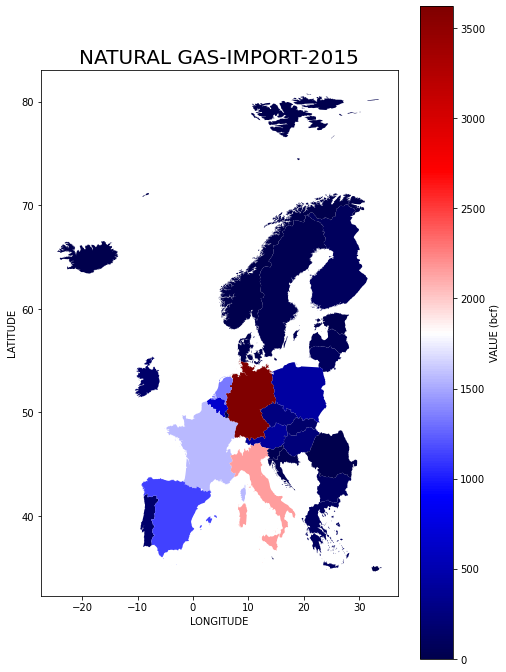

In [53]:
#user inputs
user_year = input("Please type the Year (1991-2020): ")
map_category = input("Please type the Map Category (CONSUMPTION/ PRODUCTION/ IMPORT/ EXPORT/ RESERVE): ").upper()

#preparing column name with respect to "merged_gdf" geoDataframe
if(map_category == "CONSUMPTION"):
  col_name = user_year+"_C"
elif(map_category == "PRODUCTION"):
  col_name = user_year+"_P"
elif(map_category == "IMPORT"):
  col_name = user_year+"_I"
elif(map_category == "EXPORT"):
  col_name = user_year+"_E"
elif(map_category == "RESERVE"):
  col_name = user_year+"_R"

if(map_category == "CONSUMPTION" or map_category == "PRODUCTION" or map_category == "IMPORT" or map_category == "EXPORT"):
  unit = "(bcf)"
elif(map_category == "RESERVE"):
  unit = "(tcf)"

#plot the graph
ax = merged_gdf.plot(column=col_name, figsize=(8,12), legend=True, cmap="seismic", legend_kwds={"label":"VALUE "+unit})
plt.title("NATURAL GAS-"+map_category+"-"+user_year, fontsize=20)
ax.set(xlabel="LONGITUDE", ylabel="LATITUDE")

#wrinting as .pdf file
image_name ="NATURAL GAS-"+map_category+"-"+user_year+".png"
plt.savefig(image_name, dpi=300, bbox_inches="tight")

####**BarPlot based on user input Year for Natural Gas reserves**
- **Input - Year (1991-2020)**
According to the user input year, BarPlot (Country vs Natural gas Reserve %) will be generated. Here we can plot and save BarPlots by changing the year.

Please type the Year (1991-2020): 2015


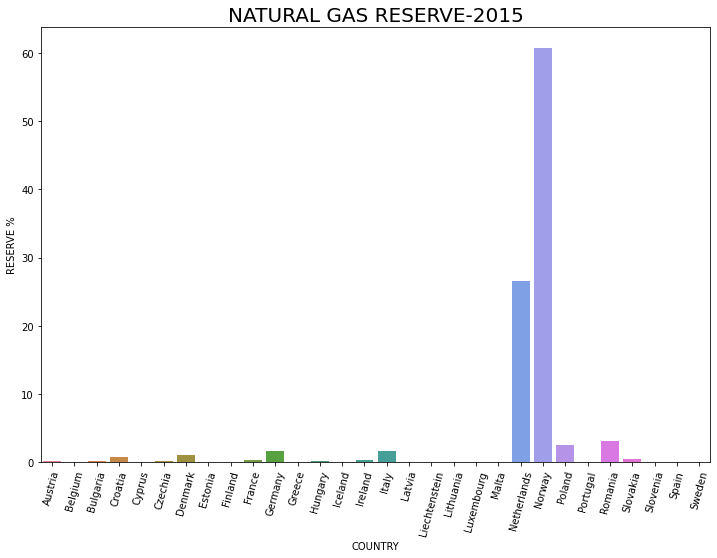

In [54]:
#user inputs
user_year = input("Please type the Year (1991-2020): ")

#preparing column name with respect to "merged_gdf" geoDataframe
coloumn_name = user_year+"_R_PER"

#plot the graph
#sns.set(rc={'figure.figsize':(20,8)})
plt.figure(figsize=(12,8))
ax = sns.barplot(data=merged_gdf, x=merged_gdf["COUNTRY"], y=merged_gdf[coloumn_name], ci=None, palette="husl")
ax.set(xlabel="COUNTRY", ylabel="RESERVE %")
plt.title("NATURAL GAS RESERVE-"+user_year, fontsize=20)
plt.xticks(rotation=75)

#wrinting as .pdf file
image_name="NATURAL GAS RESERVE-"+user_year+".pdf"
plt.savefig(image_name, dpi=100, bbox_inches="tight")

####**LinePlot based on user input EEA Country for (CONSUMPTION/ PRODUCTION/ IMPORT/ EXPORT/ RESERVE)**
- **Input - EEA Country**
According to the user input year, BarPlot (Year vs Value-bcf) will be generated. Here we can plot and save BarPlots by changing the EEA Country.

Please type the EEA Country Name : Germany


,YEAR,VALUE,TYPE
0,1991,2776.00,Consumption
1,1992,2739.45,Consumption
2,1993,2829.83,Consumption
3,1994,2965.08,Consumption
4,1995,3171.57,Consumption


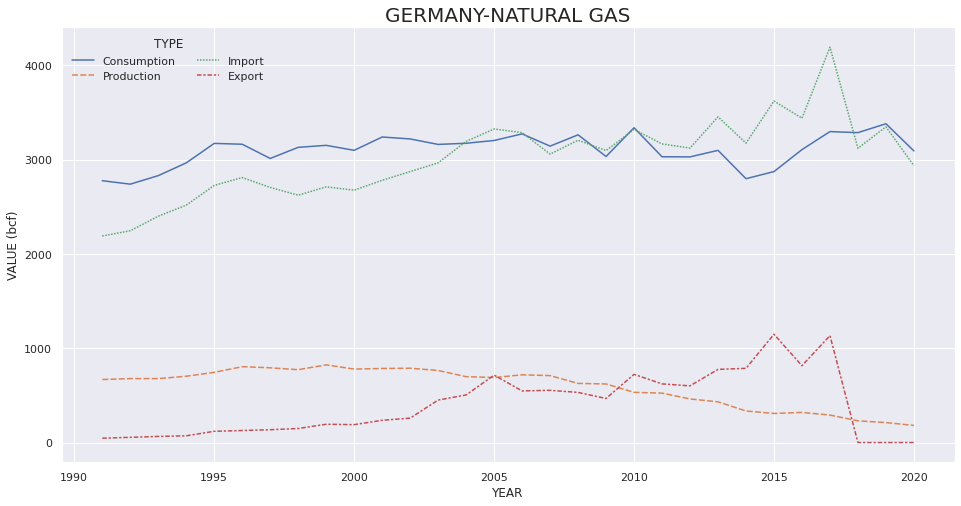

In [55]:
#user inputs
user_country = input("Please type the EEA Country Name : ").capitalize()

#new dataframe creating from "merged_gdf"
user_country_df=merged_gdf.loc[merged_gdf["COUNTRY"]==user_country]
year=[]
value1=[]
type=[]

for i in range(4):
  for j in range(30):
    year.append(1991+j)

for i in range(120):
  if(i<30):
    value1.append(user_country_df.iloc[0,1+i])
    type.append("Consumption")
  elif(i>=30 and i<60):
    value1.append(user_country_df.iloc[0,1+i])
    type.append("Production")
  elif(i>=60 and i<90):
    value1.append(user_country_df.iloc[0,1+i])
    type.append("Import")
  elif(i>=90 and i<120):
    value1.append(user_country_df.iloc[0,1+i])
    type.append("Export")

user_country_df=pd.DataFrame(data={"YEAR":year, "VALUE":value1, "TYPE":type})

#plot the graph
sns.set(rc={'figure.figsize':(16,8)})
ax=sns.lineplot(data=user_country_df, x="YEAR", y="VALUE", style="TYPE", hue="TYPE")
plt.title(user_country.upper()+"-NATURAL GAS", fontsize=20)
ax.set(xlabel="YEAR", ylabel="VALUE (bcf)")
plt.legend(loc='best', ncol=2, frameon=False, title="TYPE")

#wrinting as .pdf file
image_name=user_country.upper()+"-NATURAL GAS.pdf"
plt.savefig(image_name, dpi=100, bbox_inches="tight")

user_country_df.head()

In [56]:
print(f"EEA Countries are :\n")
merged_gdf["COUNTRY"].unique()

EEA Countries are :



array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

####**LinePlot based on User input Year for (CONSUMPTION/ PRODUCTION/ IMPORT/ EXPORT/ RESERVE)**
- **Input - Year (1991-2020)**
According to the user input year, BarPlot (Country vs Value-bcf) will be generated. Here we can plot and save BarPlots by changing the Year.

Please type the Year (1991-2020): 2015


,COUNTRY,VALUE,TYPE
0,Austria,295.62,Consumption
1,Belgium,605.16,Consumption
2,Bulgaria,111.29,Consumption
3,Croatia,72.54,Consumption
4,Cyprus,0.00,Consumption


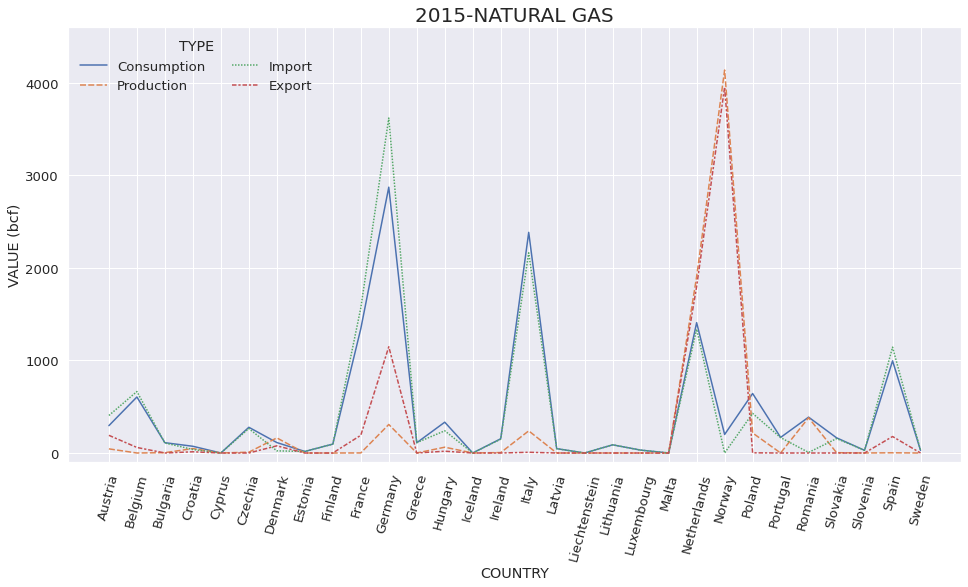

In [57]:
#user inputs
user_year = input("Please type the Year (1991-2020): ")

#new dataframe creating from "merged_gdf"
country=[]
value=[]
type=[]

for i in range(4):
  for j in range(30):
    country.append(merged_gdf.iloc[j,0])

for i in range(4):
  if(i==0):
    for j in range(30):
      coloumn_name=user_year+"_C"
      value.append(merged_gdf.at[j,coloumn_name])
      type.append("Consumption")
  elif(i==1):
    for j in range(30):
      coloumn_name=user_year+"_P"
      value.append(merged_gdf.at[j,coloumn_name])
      type.append("Production")
  elif(i==2):
    for j in range(30):
      coloumn_name=user_year+"_I"
      value.append(merged_gdf.at[j,coloumn_name])
      type.append("Import")
  elif(i==3):
    for j in range(30):
      coloumn_name=user_year+"_E"
      value.append(merged_gdf.at[j,coloumn_name])
      type.append("Export")

user_year_df=pd.DataFrame(data={"COUNTRY":country, "VALUE":value, "TYPE":type})

#plot the graph
sns.set(rc={'figure.figsize':(16,8)})
sns.set(font_scale=1.2)
ax=sns.lineplot(data=user_year_df, x="COUNTRY", y="VALUE", hue="TYPE", style="TYPE")
plt.ylim(-100,4600)
plt.title(user_year+"-NATURAL GAS", fontsize=20)
plt.legend(loc='best', ncol=2, frameon=False, title="TYPE")
ax.set(xlabel="COUNTRY", ylabel="VALUE (bcf)")
plt.xticks(rotation=75)

#wrinting as .png file
image_name=user_year+"-NATURAL GAS.pdf"
plt.savefig(image_name, dpi=100, bbox_inches="tight")

user_year_df.head()

[Natural Gas LinePlot Video](https://youtu.be/h8cz0l05w60)

####**HeatMap based on User input Year for (CONSUMPTION/ PRODUCTION/ IMPORT/ EXPORT/ RESERVE)**
- **Input - Year (1991-2020)**
According to the user input year, HeatMap (Country vs Value vs Type) will be generated. Here we can plot and save HeatMaps by changing the Year.

Please type the Year (1991-2020): 2015


,AUSTRIA,BELGIUM,BULGARIA,CROATIA,CYPRUS,CZECHIA,DENMARK,ESTONIA,FINLAND,FRANCE,...,MALTA,NETHERLANDS,NORWAY,POLAND,PORTUGAL,ROMANIA,SLOVAKIA,SLOVENIA,SPAIN,SWEDEN
TYPE,,,,,,,,,,,,,,,,,,,,,
CONSUMPTION,295.62,605.16,111.29,72.54,0.0,277.86,112.87,16.63,96.27,1342.96,...,0.0,1408.57,200.23,642.80,168.31,387.41,163.83,28.82,995.99,28.56
PRODUCTION,44.60,0.00,3.69,47.64,0.0,8.72,163.08,0.00,0.00,0.74,...,0.0,1907.36,4138.92,216.55,0.00,381.40,3.32,0.11,2.19,0.00
IMPORT,405.38,664.38,108.04,37.86,0.0,263.94,23.24,16.63,95.81,1567.39,...,0.0,1338.01,0.57,428.05,166.44,6.00,155.63,28.71,1143.89,28.68
EXPORT,190.95,59.82,0.00,12.96,0.0,0.00,77.41,0.00,0.00,191.37,...,0.0,1799.69,3954.22,1.98,0.00,0.00,0.00,0.00,178.13,0.00


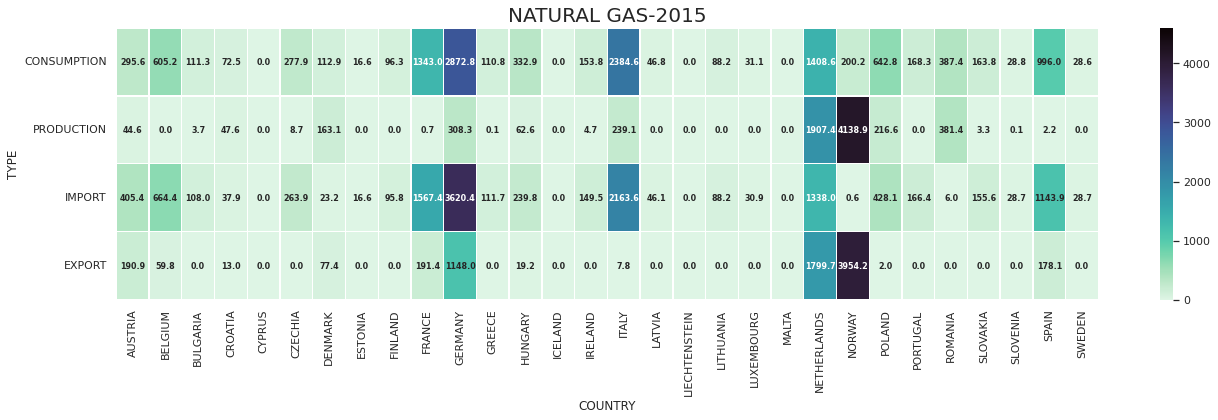

In [58]:
#user inputs
user_year = input("Please type the Year (1991-2020): ")


#new dataframe creating from "merged_gdf"
consumption_label=user_year+"_C"
production_label=user_year+"_P"
import_label=user_year+"_I"
export_label=user_year+"_E"

type=["CONSUMPTION","PRODUCTION","IMPORT","EXPORT"]

user_year_df=pd.DataFrame(data={"TYPE":type})

for i in range(30):
  country=merged_gdf.at[i,"COUNTRY"]
  temp_array=[]
  for j in range(4):
    if(j==0):
      temp_array.append(merged_gdf.at[i,consumption_label])
    elif(j==1):
      temp_array.append(merged_gdf.at[i,production_label])
    elif(j==2):
      temp_array.append(merged_gdf.at[i,import_label])
    elif(j==3):
      temp_array.append(merged_gdf.at[i,export_label])
  temp_df2=pd.DataFrame(data={"TYPE":type, country.upper():temp_array})
  user_year_df=pd.merge(user_year_df, temp_df2, on=["TYPE"])

user_year_df.set_index("TYPE", inplace=True)

#plot the graph
sns.set(rc={'figure.figsize':(22,5)})
ax=sns.heatmap(user_year_df, annot=True, fmt=".1f", annot_kws=dict(size=8, weight="bold"), linewidths=0.4, linecolor="white", cmap="mako_r", vmax=4600)
ax.set(xlabel="COUNTRY")
plt.title("NATURAL GAS-"+user_year, fontsize=20)

#wrinting as .pdf file
image_name="NATURAL GAS-"+user_year+".pdf"
plt.savefig(image_name, dpi=100, bbox_inches="tight")

user_year_df.head()


[Natural Gas Heat Map Video](https://youtu.be/P5JBO7_qdKU)

####**HeatMap based on User input Year for (CONSUMPTION/ PRODUCTION/ IMPORT/ EXPORT/ RESERVE)**
- **Input - Year (1991-2020)**
According to the user input year, HeatMap (Country vs Value vs Type) will be generated. Here we can plot and save HeatMaps by changing the Year.

Please type the Year (1991-2020): 2015


,CONSUMPTION,PRODUCTION,IMOPORT,EXPORT
COUNTRY,,,,
Austria,295.62,44.60,405.38,190.95
Belgium,605.16,0.00,664.38,59.82
Bulgaria,111.29,3.69,108.04,0.00
Croatia,72.54,47.64,37.86,12.96
Cyprus,0.00,0.00,0.00,0.00


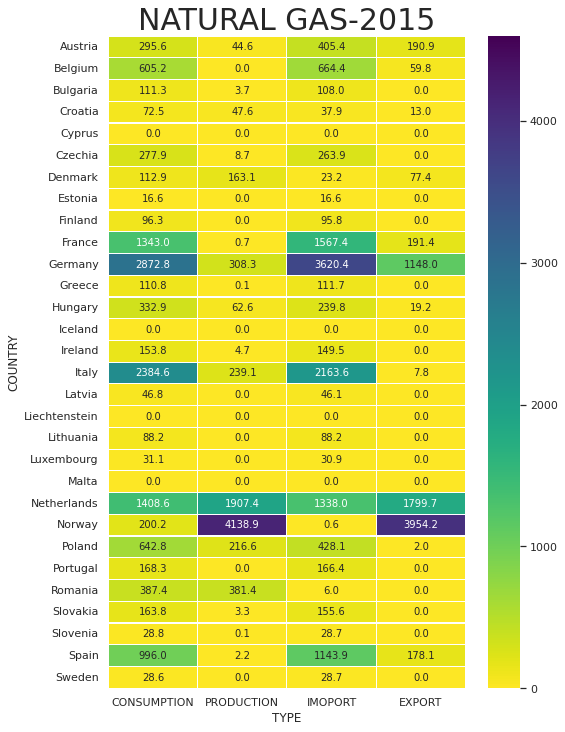

In [59]:
#user inputs
user_year = input("Please type the Year (1991-2020): ")

#preparing column name with respect to "merged_gdf" geoDataframe
consumption_label=user_year+"_C"
production_label=user_year+"_P"
import_label=user_year+"_I"
export_label=user_year+"_E"

#new dataframe creating from "merged_gdf"
user_year_df=pd.DataFrame(data={"COUNTRY":merged_gdf["COUNTRY"], "CONSUMPTION":merged_gdf[consumption_label], "PRODUCTION":merged_gdf[production_label], "IMOPORT":merged_gdf[import_label], "EXPORT":merged_gdf[export_label]})
user_year_df.set_index("COUNTRY", inplace=True)

#plot the graph
sns.set(rc={'figure.figsize':(8,12)})
ax=sns.heatmap(user_year_df, annot=True, fmt=".1f", annot_kws=dict(size=10), linewidths=0.2, linecolor="white", cmap="viridis_r", vmax=4600)
ax.set(xlabel="TYPE")
plt.title("NATURAL GAS-"+user_year, fontsize=30)

#wrinting as .pdf file
image_name="NATURAL GAS-"+user_year+".pdf"
plt.savefig(image_name, dpi=100, bbox_inches="tight")

user_year_df.head()


##**6. Final reflections**

Following findings are collected from this analysis.

- **EEA countries which having the suffiecient natural gas reserves to processing and best natural gas exporters.**
 Norway and Netherlands have considerable amount of Natural gas reserves. As well as they export high amount of Natural gas than others. Due to less consumption of Natural gas, Norway and Netherlands can fullfil their Natural gas requirement as well as they can export natural gas by other countries.
- **EEA countries which mainly depend on importing natual gas.**
Austria, Belgium, Czechia, France, Germany, Greece, Italy, Portugal, Spain, Sweden countries are highly depend on imports, as well as high consumption of natural gas.

- **EEA countries which will be faced to natural gas crisis in near future due to Russia-Ukraine war**
According to above findings Austria, Belgium, Czechia, France,  Greece, Portugal, Spain, Sweden will be dangered due to Natura gas energy crisis in near future. But Germany and Italy have their own natural gas reserves then they can survive during natural gas enrgy crisis. 

##**References**

1.  [U.S. Energy Information Administration](https://www.eia.gov/international/data/world)

2.   [Natural Earth](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/)

3.   [Ensure access to affordable, reliable, sustainable and modern energy for all](https://sdgs.un.org/goals/goal7)

4. [Natural Gas in Europe: The Potential Impact of Disruptions to Supply](https://www.elibrary.imf.org/view/journals/001/2022/145/article-A001-en.xml)

5. [seaborn](https://seaborn.pydata.org/)

6. [Matplotlib i](https://matplotlib.org/2.0.2/index.html)

7. [GeoPandas](https://geopandas.org/en/stable/docs/user_guide.html)

8. [EU’s industries dependent on electricity and natural gas](https://ec.europa.eu/eurostat/web/products-eurostat-news/w/DDN-20221202-2)
